In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("/Users/dgagne/data/cabauw_derived_data.csv", index_col="Time")

In [7]:
data.columns

Index(['temperature_10 m_K', 'pressure_2 m_hPa',
       'potential temperature_10 m_K', 'mixing ratio_10 m_g kg-1',
       'virtual potential temperature_10 m_K', 'air density_10 m_kg m-3',
       'wind speed_10 m_m s-1', 'wind direction_10 m_m s-1',
       'u wind_10 m_m s-1', 'v wind_10 m_m s-1', 'mixing ratio_2 m_g kg-1',
       'temperature_0 m_K', 'potential temperature_0 m_K',
       'virtual potential temperature_0 m_K', 'friction velocity_surface_K',
       'temperature scale_surface_K', 'moisture scale_surface_g kg-1',
       'bulk richardson_surface_', 'obukhov length_surface_m'],
      dtype='object')

In [3]:
data["friction velocity_surface_K"].min()

0.0

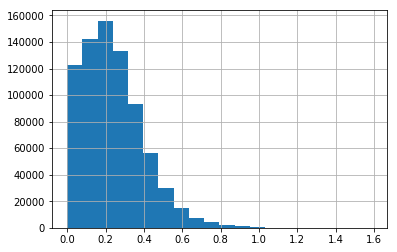

In [9]:
data["friction velocity_surface_K"].hist(bins=20)

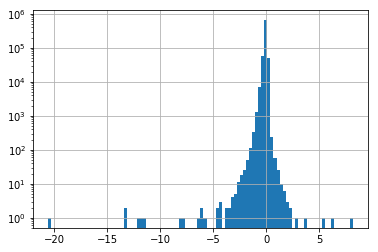

In [6]:
data["temperature scale_surface_K"].hist(bins=100)
plt.gca().set_yscale("log")

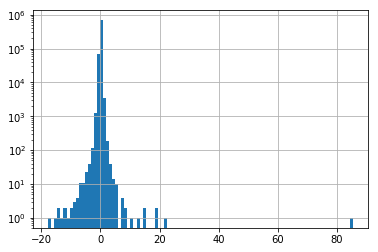

In [10]:
data["moisture scale_surface_g kg-1"].hist(bins=100)
plt.gca().set_yscale("log")

In [11]:
for col in data.columns:
    print(col.split("_"))

['temperature', '10 m', 'K']
['pressure', '2 m', 'hPa']
['potential temperature', '10 m', 'K']
['mixing ratio', '10 m', 'g kg-1']
['virtual potential temperature', '10 m', 'K']
['air density', '10 m', 'kg m-3']
['wind speed', '10 m', 'm s-1']
['wind direction', '10 m', 'm s-1']
['u wind', '10 m', 'm s-1']
['v wind', '10 m', 'm s-1']
['mixing ratio', '2 m', 'g kg-1']
['temperature', '0 m', 'K']
['potential temperature', '0 m', 'K']
['virtual potential temperature', '0 m', 'K']
['friction velocity', 'surface', 'K']
['temperature scale', 'surface', 'K']
['moisture scale', 'surface', 'g kg-1']
['bulk richardson', 'surface', '']
['obukhov length', 'surface', 'm']


In [27]:
input_cols = ["temperature_10 m_K", 
              "pressure_2 m_hPa", 
              "potential temperature_10 m_K",
              "wind speed_10 m_m s-1",
              "mixing ratio_2 m_g kg-1",
              "temperature_0 m_K",
              "potential temperature_0 m_K",
              "bulk richardson_surface_"]

In [75]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=3, verbose=1)
rf.fit(data[input_cols], data["friction velocity_surface_K"])

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   50.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [77]:
for c, col in enumerate(input_cols):
    print(col, rf.feature_importances_[c])

temperature_10 m_K 0.004141570139546811
pressure_2 m_hPa 0.00178794498922874
potential temperature_10 m_K 0.002263389811460225
wind speed_10 m_m s-1 0.9676174163501596
mixing ratio_2 m_g kg-1 0.0038033020230201753
temperature_0 m_K 0.015871300077939705
potential temperature_0 m_K 0.0012962205328762744
bulk richardson_surface_ 0.0032188560757684575


In [71]:
np.count_nonzero(np.isinf(data[input_cols].values))

0

(array([1.30000e+01, 1.40000e+01, 1.40000e+01, 2.40000e+01, 1.70000e+01,
        1.30000e+01, 2.20000e+01, 2.50000e+01, 2.00000e+01, 2.40000e+01,
        2.40000e+01, 2.60000e+01, 2.00000e+01, 2.70000e+01, 3.20000e+01,
        4.80000e+01, 3.20000e+01, 3.10000e+01, 4.60000e+01, 4.90000e+01,
        4.60000e+01, 4.80000e+01, 4.40000e+01, 5.80000e+01, 5.60000e+01,
        7.20000e+01, 6.80000e+01, 7.00000e+01, 7.00000e+01, 9.00000e+01,
        1.05000e+02, 1.16000e+02, 1.22000e+02, 1.46000e+02, 1.82000e+02,
        1.72000e+02, 2.03000e+02, 2.52000e+02, 2.78000e+02, 3.73000e+02,
        4.48000e+02, 5.63000e+02, 6.85000e+02, 9.24000e+02, 1.36400e+03,
        1.98900e+03, 3.40100e+03, 6.77700e+03, 1.87340e+04, 3.77591e+05,
        3.36832e+05, 6.16700e+03, 1.76900e+03, 8.15000e+02, 4.79000e+02,
        3.07000e+02, 2.17000e+02, 1.42000e+02, 9.60000e+01, 6.10000e+01,
        7.40000e+01, 5.30000e+01, 3.80000e+01, 3.30000e+01, 4.10000e+01,
        2.80000e+01, 2.10000e+01, 1.10000e+01, 1.90

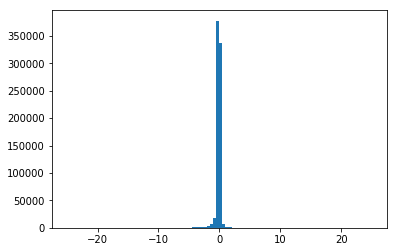

In [52]:
plt.hist(data["bulk richardson_surface_"], range=(-25, 25), bins=100)

In [73]:
data["bulk richardson_surface_"].quantile(0.0001)

-2426552.4246926317

(array([1.8880e+03, 4.1080e+03, 7.8840e+03, 1.2725e+04, 1.6025e+04,
        2.0432e+04, 2.3962e+04, 2.6963e+04, 3.0178e+04, 3.2119e+04,
        3.6107e+04, 3.4717e+04, 3.4878e+04, 3.5984e+04, 3.3128e+04,
        3.1934e+04, 2.9735e+04, 2.8160e+04, 2.6654e+04, 2.4664e+04,
        2.4765e+04, 2.1365e+04, 1.9970e+04, 2.0163e+04, 1.7388e+04,
        1.6182e+04, 1.5268e+04, 1.3822e+04, 1.2547e+04, 1.2255e+04,
        1.0216e+04, 9.1530e+03, 8.4300e+03, 8.0560e+03, 6.5510e+03,
        5.8540e+03, 5.3910e+03, 4.7770e+03, 4.2320e+03, 3.9040e+03,
        3.7030e+03, 3.1610e+03, 2.7680e+03, 2.8100e+03, 2.3190e+03,
        2.1460e+03, 1.9120e+03, 1.6870e+03, 1.4690e+03, 1.2740e+03,
        1.2440e+03, 9.5000e+02, 8.2600e+02, 7.8300e+02, 5.8500e+02,
        4.7700e+02, 4.5100e+02, 4.0100e+02, 3.4600e+02, 3.2100e+02,
        2.5400e+02, 2.4300e+02, 1.9200e+02, 2.1200e+02, 1.7500e+02,
        1.2000e+02, 1.1200e+02, 1.2100e+02, 1.3400e+02, 1.0100e+02,
        6.9000e+01, 6.1000e+01, 5.5000e+01, 5.20

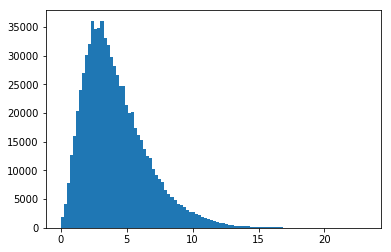

In [68]:
np.count_nonzero(data["wind speed_10 m_m s-1"].values == 0)

336